# **STANDARD NOTEBOOK TO GET RESULTS**

In [1]:
import pandas as pd

import os
import sys

temp = os.getcwd()

module_path = os.path.abspath(os.path.join(os.getcwd(), '../Main_modules'))
sys.path.append(module_path)

import warnings
# import process
from PyFolioC_classes import PyFolioC
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell


## 1. Clean the Data

In [2]:
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\OPCL_20000103_20201231.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/OPCL_20000103_20201231.csv'
# James path : r'C:\Users\james\ICAIF_25\Data\OPCL_20000103_20201231.csv'
df = pd.read_csv(r'C:\Users\james\ICAIF_25\Data\OPCL_20000103_20201231.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.dropna() # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

df_cleaned = df_cleaned.transpose() ## WE WANT COLUMNS TO BE VECTOR OF RETURN FOR A GIVEN TICKER

df_cleaned.iloc[5025,:]

ticker
AA     0.006530
ABM   -0.010814
ABT    0.004153
ADI    0.000168
ADM    0.008015
         ...   
XLY    0.003114
XOM    0.010951
XRX    0.002444
YUM    0.000596
ZTR    0.000000
Name: 31/12/2019, Length: 663, dtype: float64

## 2. Run the code

Once the run is completed, you have: 
* the overall return -> overall return
* the PnL associated to the strategy
* the daily PnL associated to the strategy
* the Sharpe Ratio associated to the strategy

In [3]:
##################################################################### PARAMETERS #####################################################################
historical_data = df_cleaned
number_of_repetitions = 1 ## 10
lookback_window = [3190,3265]  ## new lookback_window
evaluation_window = 1
number_of_clusters = 24
cov_method = 'SPONGE'
sigma = 0.01 ## on a fait bouger sigma ici
var_order = 20
markowitz_type = 'expected_returns'
beta = 0.9
K = 4  # Number of fold for the cross validation
tc=0.0001

##################################################################### PORTFOLIO ######################################################################
# portfolio = PyFolioC(number_of_repetitions=number_of_repetitions, historical_data=historical_data, lookback_window=lookback_window, evaluation_window=evaluation_window, number_of_clusters=number_of_clusters, sigma=sigma, eta=eta, EWA_cov=True, beta=beta, short_selling=True, cov_method=cov_method, markowitz_type=markowitz_type, transaction_cost_rate=tc)
portfolio = PyFolioC(number_of_repetitions=number_of_repetitions, historical_data=historical_data, lookback_window=lookback_window, evaluation_window=evaluation_window, number_of_clusters=number_of_clusters, sigma=sigma, EWA_cov=True, beta=beta, short_selling=True, cov_method=cov_method, transaction_cost_rate=tc, var_order=var_order)
## year 2008-2009 ==> 2007:2262 if evaluation_window == 2
## year 2008-2009 ==> 2007:2265 if evaluation_window == 5
## year 2012-2013 ==> 3016:3265
## year 2018-2019 ==> 4524:4774
## year 2016-2019 ==> 4021:4774
## year 2010-2020 ==> 2512:5279 (we go until 5277 to have a multiple of 5 for the difference)
######### year 2013-2019 ==> 3265:5025 352 window of 5

In [4]:
overall_return, PnL, portfolio_value, daily_PnL, Turnovers, most_corr_contribution = portfolio.sliding_window_past_indep(352,include_transaction_costs=True)

step 1/352, portfolio value (cumulative): 1.0015
step 2/352, portfolio value (cumulative): 1.0036
step 3/352, portfolio value (cumulative): 0.9965
step 4/352, portfolio value (cumulative): 1.0047
step 5/352, portfolio value (cumulative): 0.9954
step 6/352, portfolio value (cumulative): 0.9941
step 7/352, portfolio value (cumulative): 1.0024
step 8/352, portfolio value (cumulative): 1.0021
step 9/352, portfolio value (cumulative): 1.0025
step 10/352, portfolio value (cumulative): 0.9984
step 11/352, portfolio value (cumulative): 0.9924
step 12/352, portfolio value (cumulative): 0.9896
step 13/352, portfolio value (cumulative): 0.9857
step 14/352, portfolio value (cumulative): 0.9889
step 15/352, portfolio value (cumulative): 0.9930
step 16/352, portfolio value (cumulative): 0.9917
step 17/352, portfolio value (cumulative): 0.9956
step 18/352, portfolio value (cumulative): 0.9923
step 19/352, portfolio value (cumulative): 0.9918
step 20/352, portfolio value (cumulative): 0.9917
step 21/3

KeyboardInterrupt: 

In [14]:
x = pd.DataFrame(most_corr_contribution).T

In [15]:
x.columns = [f'Contribution cluster {i}' for i in range(1, 25)]

In [ ]:
x

,Contribution cluster 1,Contribution cluster 2,Contribution cluster 3,Contribution cluster 4,Contribution cluster 5,Contribution cluster 6,Contribution cluster 7,Contribution cluster 8,Contribution cluster 9,Contribution cluster 10,...,Contribution cluster 15,Contribution cluster 16,Contribution cluster 17,Contribution cluster 18,Contribution cluster 19,Contribution cluster 20,Contribution cluster 21,Contribution cluster 22,Contribution cluster 23,Contribution cluster 24
0,0.106220,0.099892,0.237547,0.166115,-0.078436,0.200664,0.508092,0.426578,-0.254474,-0.178732,...,0.443218,-0.263789,-0.017418,0.162641,0.191001,-0.069848,-0.001508,-2.204304,0.292220,-0.062535
1,-0.002777,-0.046728,-0.014672,0.001348,-0.001208,-0.000418,-0.033593,-0.066543,-0.008193,-0.003193,...,-0.017485,-0.077199,0.037183,-0.013148,-0.003810,0.003234,0.209673,-0.000213,-0.009376,0.727729
2,-0.112242,0.032106,-0.019147,-0.039409,-0.043262,-0.004619,-0.270691,0.024025,0.010497,-0.029398,...,0.014568,-0.091407,-0.041077,-0.026949,0.088782,0.035444,0.157641,-0.005811,0.508068,-0.151617
3,0.055974,-0.037972,-0.039419,-0.280588,0.121908,0.005661,0.017966,-0.018737,-0.107982,-0.245744,...,0.029188,-0.001900,0.158998,-0.303861,0.221624,-0.330191,-0.006864,-0.014802,0.229881,0.059140
4,-0.031683,-0.017505,-0.020790,-0.028674,-0.073130,-0.015852,-0.223511,-0.242435,-0.073722,0.019926,...,0.006713,-0.069844,0.290133,-0.095406,-0.004042,-0.047378,-0.003545,0.006836,1.315806,-0.379627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,-0.040451,-0.066109,-0.006413,-0.000361,-0.317156,-0.009236,-0.106476,0.001342,0.019565,-0.079196,...,0.020840,-0.016329,-0.014954,0.070158,-0.011866,-0.000155,0.017213,-0.011933,0.059576,-0.027929
348,1.374373,-0.025822,-0.003017,-0.594751,3.140992,-0.040981,0.048336,-0.689648,0.966726,0.405475,...,0.018579,-2.388016,-0.035498,-0.021538,0.093999,0.380773,0.218217,-0.102331,-1.225404,-0.158186
349,-1.324558,1.224776,-0.148107,1.434301,0.008879,-0.205715,-0.028702,-0.575604,-0.032304,0.022584,...,0.082166,0.052277,-0.019986,-0.125894,-0.197468,0.341245,-0.044596,-1.370459,0.235681,0.007227
350,-0.039346,-0.040975,-0.002469,0.006611,-0.330707,-0.139836,-0.067423,-0.015557,-0.009169,-0.002086,...,0.018720,-0.020502,-0.017109,-0.001508,0.732659,0.284190,-0.048874,0.001658,-0.201176,-0.000336


In [17]:
# Convertir la liste de listes en DataFrame
most_corr_df = pd.DataFrame(most_corr_contribution).T

# Renommer les colonnes
num_clusters = len(most_corr_contribution)
column_names = [f'contribution cluster {i+1}' for i in range(num_clusters)]
most_corr_df.columns = column_names

In [ ]:
x.to_csv(r'C:\Users\james\ICAIF_25\Outputs\Most correlated\most_corr_penalised.csv', index=False)

OSError: Cannot save file into a non-existent directory: '\Users\khelifanail\Documents\GitHub\Portfolio_clustering_project\Outputs\Most correlated'

In [18]:
df_PnL = pd.DataFrame(PnL, columns=['PnL'])


# df_PnL.to_csv(f'PnL_SPONGE-Short-cov_75-5-0.01_clusters=24_EWA.csv', index=False)

In [19]:
import warnings
from PyFolioC import PyFolio
warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

##################################################################### PARAMETERS #####################################################################
historical_data = df_cleaned
number_of_repetitions = 10
lookback_window = [3190,3265]  ## new lookback_window
evaluation_window = 5
number_of_clusters = 17
cov_method = 'signed_laplacian'
sigma = 0.01 ## on a fait bouger sigma ici
eta = 0
markowitz_type = 'expected_returns'
beta = 0.999
K = 4  # Number of fold for the cross validation
tc=0.0001
for cov_method in ['SPONGE_sym', 'signed_laplacian']:
    ##################################################################### PORTFOLIO ######################################################################
    portfolio = PyFolioC(number_of_repetitions=number_of_repetitions, historical_data=historical_data, lookback_window=lookback_window, evaluation_window=evaluation_window, number_of_clusters=number_of_clusters, sigma=sigma, eta=eta, EWA_cov=False, beta=beta, short_selling=True, cov_method=cov_method, markowitz_type=markowitz_type, transaction_cost_rate=tc)
    overall_return, PnL, portfolio_value, daily_PnL, Turnovers= portfolio.sliding_window_past_indep(352,include_transaction_costs=True)
    df_PnL = pd.DataFrame(PnL, columns=['PnL'])
    df_PnL.to_csv(f'PnL_{cov_method}-Short-cov_75-5-0.csv', index=False)

ModuleNotFoundError: No module named 'PyFolioC'

Correlation level and estimation of future returns

In [ ]:
lookback_window = [4265,4265]
L1=[]
L2=[]
for j in range(663):
    L1.append([])
    L2.append([])
    for i in range(50):
        L1[j].append(df_cleaned.iloc[3265+i,j])
        L2[j].append(df_cleaned.iloc[3215+i:3265+i,j].mean())

import numpy as np

Corels=[]
for j in range (663):
    asset_returns = np.array(L1[j])
    Corel=0
    for i in range(50):
        # Initialisation du DataFrame pour stocker les rendements bruités
        noised_returns = asset_returns.copy()
        noise_std_dev = 0.1
        # Génération du bruit
        noise=[]
        for i in range(50):
            noise.append( np.random.normal(0, noise_std_dev))
        # Ajout du bruit aux rendements de l'actif
        noised_returns = asset_returns + noise
        noised_returns
        # Calculer min et max de x et y
        x_min, x_max = asset_returns.min(), asset_returns.max()
        y_min, y_max = noised_returns.min(), noised_returns.max()
        rescale=max(np.abs(y_min), y_max)
        # Mise à l'échelle de y pour qu'elle corresponde à l'échelle de x
        y_scaled = (noised_returns- y_min) * (x_max - x_min) / (y_max - y_min) + x_min

        correlation_matrix = np.corrcoef(asset_returns, y_scaled)
        Corel+=correlation_matrix[0, 1]/50
    Corels.append(Corel)
print(np.array(Corels).mean())

import matplotlib.pyplot as plt

# Données pour la première courbe
x1 = [i for i in range(1, 51)]
y1= asset_returns

# Données pour la deuxième courbe
y2 = y_scaled

# Création du graphique
plt.figure()

# Ajout des courbes au graphique
plt.plot(x1, y1, label='Real returns')
plt.plot(x1, y2, label='Noised returns')

# Ajout d'un titre et des labels pour les axes
plt.title('Comparison of noised returns and real returns for a 1% correlation level')
plt.xlabel('Trading days')
plt.ylabel('Daily returns')

# Ajout d'une légende
plt.legend()

# Affichage du graphique
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Génération de données pour les deux courbes
x = np.array([0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.8, 0.85, 0.9, 0.92, 0.95, 1])
y1 = np.array([0.219, 0.241, 0.251, 0.258, 0.263, 0.269, 0.271, 0.276, 0.284, 0.291, 0.294, 0.306, 0.322, 0.344, 0.405])
y2=np.array([20.6, ])

# Création du graphique
plt.figure(figsize=(8, 4))  # Taille du graphique

# Tracé de la première courbe
plt.plot(x, y1, color='blue')  # Courbe sin(x) en bleu



# Ajout de titres et de légendes
plt.title('Annual return in 2013 weekly strategy in function of eta')  # Titre du graphique
plt.xlabel('Eta: quality of estimation of future returns')  # Étiquette de l'axe des abscisses
plt.ylabel('Annual return in 2013')



# Affichage du graphique
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Génération de données pour les deux courbes
x = np.array([ 0.01, 0.02, 0.1, 0.3, 0.5, 0.7, 0.9, 1])
y1 = np.array([0.269, 0.272, 0., 0., 0., 0.218, 0.22, 0.222])


# Création du graphique
plt.figure(figsize=(8, 4))  # Taille du graphique

# Tracé de la première courbe
plt.plot(x, y1, color='blue')  # Courbe sin(x) en bleu



# Ajout de titres et de légendes
plt.title('Noise in function of the correlation between the returns and the noised returns')  # Titre du graphique
plt.xlabel('Eta')  # Étiquette de l'axe des abscisses
plt.ylabel('Sigma')



# Affichage du graphique
plt.show()

Transaction cost

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_two_lines(points1, points2, ax, labels):
    """ Fonction pour calculer et tracer deux droites à partir de points donnés sur un axe. """
    # Calcul et tracé pour chaque paire de points
    for points, label in zip([points1, points2], labels):
        p1, p2 = points
        m = (p2[1] - p1[1]) / (p2[0] - p1[0])  # Calcul de la pente
        b = p1[1] - m * p1[0]                # Calcul de l'ordonnée à l'origine
        x_values = np.linspace(0, 30, 100)  # Valeurs x sur l'intervalle souhaité
        y_values = m * x_values + b          # Valeurs y correspondantes
        ax.plot(x_values, y_values, label=label)          # Tracer la droite
    ax.legend()

# Créer la figure et les axes pour les deux graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
labels=['weekly', 'daily']

# Données pour le premier graphique
points_graph1_droite1 = [(0, 0.224913002325013), (1, 0.21588269119)]
points_graph1_droite2 = [(0, 0.2170871111), (1, 0.1828922402)]
plot_two_lines(points_graph1_droite1, points_graph1_droite2, ax1, labels)
ax1.set_title('Impact of transaction costs on portfolio returns')
ax1.set_xlabel('Transaction costs per dollar traded in basepoint')
ax1.set_ylabel('Annual return in 2013')
ax1.set_xlim(0, 20)
ax1.set_ylim(-0.2, 0.24)
ax1.grid(True)

# Données pour le second graphique
points_graph2_droite1 = [(0, 4.171589588), (10, 2.281795)]
points_graph2_droite2 = [(0, 4.05045159), (1, 3.3046)]
plot_two_lines(points_graph2_droite1, points_graph2_droite2, ax2, labels)
ax2.set_title('Impact of transaction costs on portfolio Sharpe ratios')
ax2.set_xlabel('Transaction costs per dollar traded in basepoint')
ax1.set_ylabel('Sharpe ratios in 2013')
ax2.set_xlim(0, 20)
ax2.set_ylim(-2, 4.5)
ax2.grid(True)

# Affichage du plot
plt.show()

Performances metrics

In [51]:
df = pd.read_csv(r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Outputs\2013-2019 jeje\PnL_Signed_lap-Short-cov_75-5-0.01.csv')
P=df.squeeze()

In [20]:
import numpy as np
import pandas as pd

def calculate_performance_metrics(PnL_Serie,duree_strat):
    """
    Calculate performance metrics for a series of end-of-day portfolio values.

    Parameters:
    PnL_Serie (pd.Series): Series of end-of-day values for the portfolio

    Returns:
    dict: Performance metrics including daily returns, volatility, total return,
          annualized return, Sharpe ratio, and Sortino ratio.
    """

    # Ensure the input is a pandas Series
    if not isinstance(PnL_Serie, pd.Series):
        raise TypeError("The end-of-day values input must be a pandas Series.")

    # Calculate daily returns
    daily_returns = PnL_Serie.pct_change()

    # Calculate the daily mean return and daily volatility
    daily_mean_return = daily_returns.mean()
    daily_volatility = daily_returns.std()

    # Calculate total and annualized returns
    total_return = PnL_Serie.iloc[-1]  - 1
    annualized_return = (1 + total_return) ** (252 / duree_strat) - 1

    # Calculate annualized daily mean return and volatility
    annualized_daily_mean_return = daily_mean_return * 252
    annualized_volatility = daily_volatility * np.sqrt(252)

    # Sharpe ratio (using annualized figures)
    sharpe_ratio = annualized_return / annualized_volatility

    # Calculate Sortino ratio
    # First, get the negative returns only
    negative_returns = daily_returns[daily_returns < 0]
    annualized_downside_volatility = negative_returns.std() * np.sqrt(252)

    # Sortino ratio uses the same mean return as Sharpe but only the downside volatility
    sortino_ratio = annualized_return / annualized_downside_volatility

    # Compile results in a dictionary
    metrics = {
        'Daily Returns': daily_returns,
        'Volatility': daily_volatility,
        'Annualized Volatility': annualized_volatility,
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio
    }

    return metrics

calculate_performance_metrics(pd.Series(P+1),1760)

NameError: name 'P' is not defined

In [21]:
def cumulative_returns(portfolio):

    # Compute cumulative returns
    cumulative_returns_res = (1 + portfolio).cumprod()

    return cumulative_returns_res

res = cumulative_returns(overall_return)

res



,return
02/01/2013,1.001452
03/01/2013,1.031565
04/01/2013,1.036662
07/01/2013,1.034225
08/01/2013,1.038803
...,...
20/05/2014,1.022557
21/05/2014,1.022065
22/05/2014,1.021365
23/05/2014,1.024362


## 3. Save the results to csv files (APPLY THE CELLS ONLY ONCE AS IT CREATES 3 FILES !!)

In [9]:
year = '2008-2020'
clustering_method = 'SPONGE_sym_short_selling'

## process.save_to_csv(year=year, clustering_method=clustering_method)

df_daily = pd.DataFrame(daily_PnL, columns=['Daily PnL'])

df_daily.to_csv(f'daily_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

df_PnL = pd.DataFrame(PnL, columns=['PnL'])

df_PnL.to_csv(f'PnL_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

df_overall_return = pd.DataFrame(overall_return.values, columns=['Return'])

df_overall_return.to_csv(f'Overall_return_{year}_{clustering_method}_{evaluation_window}.csv', index=False)

## 4. Get SP500 data for comparison

In [34]:
import yfinance as yf

def get_sp500_PnL(start_date, end_date):

    '''
    ----------------------------------------------------------------
    GENERAL IDEA : get the S&P500 index daily PnL between the star
                   and end dates
    ----------------------------------------------------------------

    ----------------------------------------------------------------
    PARAMS :

    - start_date, end_date : strings, corresponding to start and end
                             dates. The format is the datetime format
                             "YYYY-MM-DD"

    ----------------------------------------------------------------

    ----------------------------------------------------------------
    OUTPUT : pandas.DataFrame containing the S&P500 index daily
             between the star and end dates
    ----------------------------------------------------------------
    '''

    # Specify the ticker symbol for S&P 500
    ticker_symbol = "^GSPC"

    # Fetch historical data
    sp500_data = yf.download(ticker_symbol, start=start_date, end=end_date)
    sp500_data['Daily PnL'] = (sp500_data['Close'] - sp500_data['Open']) / sp500_data['Open'][0] ## /100 because we initially invest 1 dollar in our portfolio?
    sp500_PnL = sp500_data['Daily PnL'].transpose() ## we remove the -2 values to have matching values

    return sp500_PnL

In [27]:
start_date = '2013-01-01'
end_date = '2019-12-27'
year = '2008-2020'
clustering_method = 'SPONGE_sym_Short_selling'

## NAIVE: SP500
start_date = '2013-01-01'
end_date = '2019-12-31'

sp500_PnL = get_sp500_PnL(start_date, end_date)

# Generate the 1510 dates between the start and end dates
dates = pd.date_range(start=start_date, end=end_date, periods=1510)

# Interpolate the values from the original sp500_PnL vector
interpolated_sp500_PnL = np.interp(np.linspace(0, len(sp500_PnL) - 1, 1510), np.arange(len(sp500_PnL)), sp500_PnL)



portfolio_value_sp500 = cumulative_returns(interpolated_sp500_PnL)

print(len(overall_return))
print(len(portfolio_value_sp500))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


KeyError: 0

In [ ]:
def cumulative_returns(portfolio):

    # Compute cumulative returns
    cumulative_returns_res = (1 + portfolio).cumprod()

    return cumulative_returns_res

portfolio_value_clustering = cumulative_returns(overall_return)

year = '2013-2019'
clustering_method = 'SPONGE'

portfolio_mark = pd.DataFrame(portfolio_value_clustering.values, columns=['PnL'])

# portfolio_mark.to_csv(f'PnL_{year}_{clustering_method}_shortselling_eval_window={evaluation_window}_eta={eta}_sigma={sigma}.csv', index=False)

## 5. Plot Portfolio Cumulative PnL vs SP500 Cumulative PnL

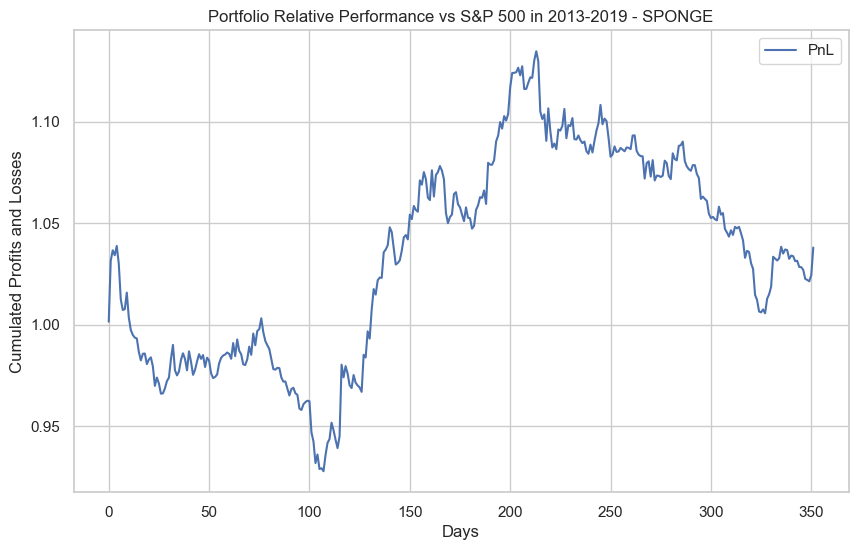

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the cumulative returns
# portfolio_cumulative = pd.DataFrame(index = portfolio_value_sp500.index, columns=[f'Portfolio Performance in {year}'], data=PnL)

# Set Seaborn style
sns.set(style="whitegrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(10, 6))
# sns.lineplot(data=portfolio_cumulative)
sns.lineplot(data=portfolio_mark)
# sns.lineplot(data=portfolio_value_sp500, label=f'S&P 500 Index in {year}')
plt.xlabel('Days')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year} - {clustering_method}')
plt.legend()
plt.show()

# 6. Plot portfolio value alone

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)

portfolio_value = pd.DataFrame(index = sp500_PnL.index, columns=[f'Portfolio Value in {year}'], data=portfolio_value)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(portfolio_value, color='blue')

# Ajouter des titres et des légendes
plt.title(f'Portfolio Value of Time for an Initial Investment of $1 in {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')

# Afficher le graphique
plt.show()

# 7. Barplot Daily PnL vs SP500

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8, label='Portfolio Daily PnL')  # Ajustez la largeur ici
ax = sns.barplot(x=days, y=sp500_PnL, color='red', width=0.8, label='SP500 Index Daily PnL')

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0,251,10))
ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='right', rotation_mode='anchor')

# Ajouter des titres et des légendes
plt.title(f'Daily PnL Evolution - {year} - {clustering_method}')
plt.xlabel('Days')
plt.ylabel('Daily PnL')
plt.legend()

# Afficher le graphique
plt.show()

# 8. Plot everything (SPONGE vs Signed Laplacian vs SP500)

In [ ]:
sp500_PnL.iloc[:-2]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

PnL_SPONGE_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_SPONGE_5_2.csv')
PnL_SPONGE_1 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2018/PnL_2018_SPONGE_1.csv')
PnL_SPONGE_sym_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_SPONGE_sym_5_2.csv')
PnL_SL_5 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2013-2016/PnL_2013-24_05_2016_signed_laplacian_5_2.csv')

#PnL_SPONGE_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_SPONGE_5_2.csv')
#PnL_SPONGE_sym_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_SPONGE_sym_5_2.csv')
#PnL_SL_5_2 = pd.read_csv('/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Outputs/2019/PnL_2019_signed_laplacian_5_2.csv')

# Calculate the cumulative returns
portfolio_cumulative_SL_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'Signed Laplacian Portfolio Performance in {year}'], data=PnL_SL_5.values)
portfolio_cumulative_SPONGE_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_5.values)
portfolio_cumulative_SPONGE_1 = pd.DataFrame(index=sp500_PnL.index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_1.values)
portfolio_cumulative_SPONGE_sym_5 = pd.DataFrame(index=sp500_PnL.index, columns=[f'Symmetric SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_sym_5.values)

# portfolio_cumulative_SL_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'Signed Laplacian Portfolio Performance in {year}'], data=PnL_SL_5_2.values)
# portfolio_cumulative_SPONGE_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_5_2.values)
# portfolio_cumulative_SPONGE_sym_5_2 = pd.DataFrame(index=sp500_PnL.iloc[:-1].index, columns=[f'Symmetric SPONGE Portfolio Performance in {year}'], data=PnL_SPONGE_sym_5_2.values)

# Combine dataframes for seaborn plotting
## combined_df = pd.concat([portfolio_cumulative_SL_5, portfolio_cumulative_SL_5_2, portfolio_cumulative_SPONGE_5, portfolio_cumulative_SPONGE_5_2, portfolio_cumulative_SPONGE_sym_5, portfolio_cumulative_SPONGE_sym_5_2, sp500_PnL.iloc[:-1].cumsum()], axis=1)
combined_df = pd.concat([portfolio_cumulative_SL_5, portfolio_cumulative_SPONGE_5, portfolio_cumulative_SPONGE_sym_5, sp500_PnL.iloc[:-2].cumsum()], axis=1)
combined_df.columns = [f'Signed Laplacian - Evaluation window {evaluation_window}', f'SPONGE - Evaluation window {evaluation_window}', f'SPONGE_sym - Evaluation window {evaluation_window}', f'S&P 500 Index in {year}']

# Set Seaborn style
sns.set(style="darkgrid")

# Plot the relative performance using Seaborn
plt.figure(figsize=(15, 8))
sns.lineplot(data=combined_df, palette=['blue', 'red', 'orange', 'green'], alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Cumulated Profits and Losses')
plt.title(f'Portfolio Relative Performance vs S&P 500 in {year}')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv(r"C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Outputs\2013-2019\PnL_2013-2019_signed_laplacian_shortselling_eval_window=5_eta=0.02.csv")
PnL=df.squeeze()
def calculate_performance_metrics(PnL_Serie,duree_strat):
    """
    Calculate performance metrics for a series of end-of-day portfolio values.

    Parameters:
    PnL_Serie (pd.Series): Series of end-of-day values for the portfolio

    Returns:
    dict: Performance metrics including daily returns, volatility, total return,
          annualized return, Sharpe ratio, and Sortino ratio.
    """

    # Ensure the input is a pandas Series
    if not isinstance(PnL_Serie, pd.Series):
        raise TypeError("The end-of-day values input must be a pandas Series.")

    # Calculate daily returns
    daily_returns = PnL_Serie.pct_change()

    # Calculate the daily mean return and daily volatility
    daily_mean_return = daily_returns.mean()
    daily_volatility = daily_returns.std()

    # Calculate total and annualized returns
    total_return = PnL_Serie.iloc[-1]  - 1
    annualized_return = (1 + total_return) ** (252 / duree_strat) - 1

    # Calculate annualized daily mean return and volatility
    annualized_daily_mean_return = daily_mean_return * 252
    annualized_volatility = daily_volatility * np.sqrt(252)

    # Sharpe ratio (using annualized figures)
    sharpe_ratio = annualized_daily_mean_return / annualized_volatility

    # Calculate Sortino ratio
    # First, get the negative returns only
    negative_returns = daily_returns[daily_returns < 0]
    annualized_downside_volatility = negative_returns.std() * np.sqrt(252)

    # Sortino ratio uses the same mean return as Sharpe but only the downside volatility
    sortino_ratio = annualized_daily_mean_return / annualized_downside_volatility

    # Compile results in a dictionary
    metrics = {
        'Daily Returns': daily_returns,
        'Volatility': daily_volatility,
        'Annualized Volatility': annualized_volatility,
        'Total Return': total_return,
        'Annualized Return': annualized_return,
        'Sharpe Ratio': sharpe_ratio,
        'Sortino Ratio': sortino_ratio
    }

    return metrics

calculate_performance_metrics(PnL,duree_strat=1510)